# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
base_path = Path.cwd().parent / 'assets'
file_name = 'ALUGUEL_MOD12.csv'
full_path = base_path / file_name

df = pd.read_csv(full_path, delimiter=';')
df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
print('\n\nTipos de dados das colunas:\n\n', df.dtypes)
print('\nNúmero de valores nulos por coluna:\n\n', df.isnull())



Tipos de dados das colunas:

 Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

Número de valores nulos por coluna:

       Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0             False             False     False      False        False   
1             False             False     False      False        False   
2             False             False     False      False        False   
3             False             False     False      False        False   
4             False             False     False      False        False   
...             ...               ...       ...        ...          ...   
7198          False             False     False      False        False   
7199          False             False     False      False        False   
7200          False             False     False      False

Ao verificar os dados, constatou-se que não há dados faltantes no conjunto analisado. A ausência de valores nulos ou ausentes indica que todas as observações estão completas

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [4]:
df = df.describe()
print('\n\nEstatísticas descritivas:\n\n', df)




Estatísticas descritivas:

        Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%      

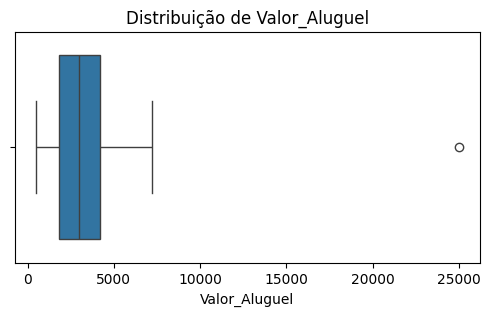

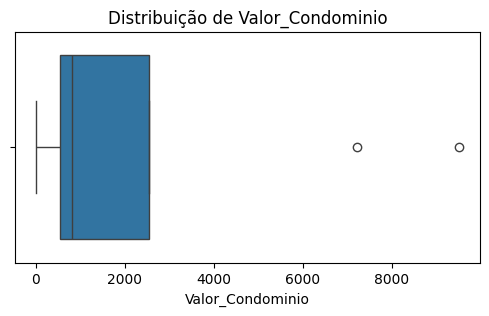

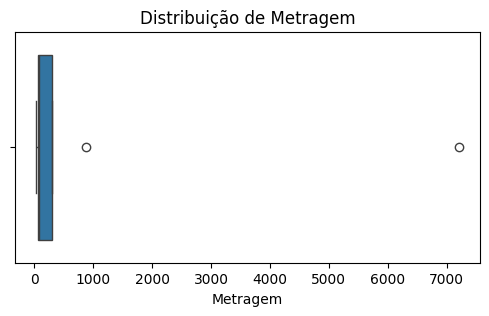

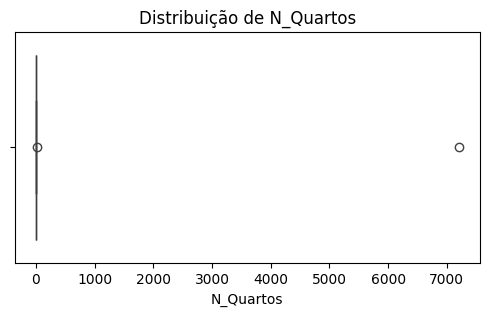

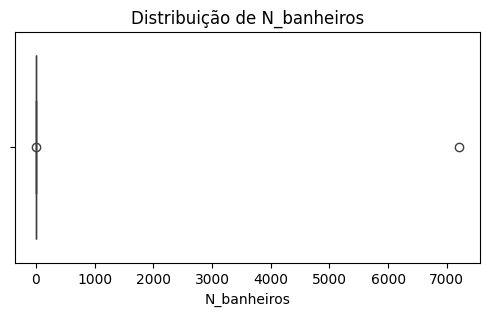

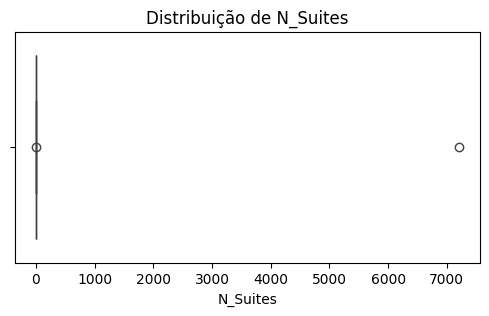

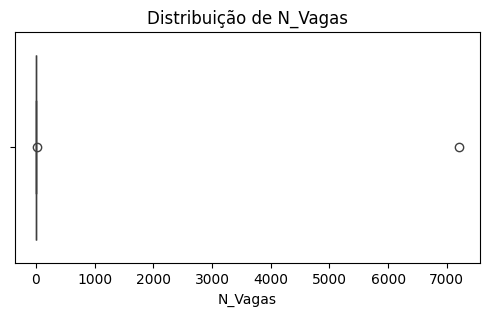

In [5]:
cols = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem', 'N_Quartos', 
        'N_banheiros', 'N_Suites', 'N_Vagas']

for col in cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Distribuição de {col}')
    plt.show()

Valor_Aluguel — Motivo do tratamento: valores muito altos plausíveis (imóveis de luxo).
Método: Winsorização usando limites via IQR (Q1 - 1.5·IQR, Q3 + 1.5·IQR) e insistir que o limite inferior ≥ 0 (aluguel não pode ser negativo).
Justificativa: preserva observações (não exclui) e reduz a influência de poucos extremos em médias/regressões.

Valor_Condominio — Idêntico a Valor_Aluguel: winsorizar com IQR e lower ≥ 0.

Metragem — Motivo do tratamento: valores muito grandes (ex: 7203) podem ser reais para propriedades grandes, mas frequentemente são erros. Winsorizar por IQR (lower ≥ 0).
Justificativa: mantém observações grandes reais mas limita extremos que distorcem análises.

N_Quartos, N_banheiros, N_Suites, N_Vagas — Motivo do tratamento: contagens que apresentaram valores absurdos (ex.: 7203) — podem ser erro de registro ou valores de luxo.
Método: Winsorização por IQR, forçando limite inferior ≥ 0; após winsorizar, arredondar e converter para inteiro (tipo Int64 para preservar NaNs).
Justificativa: preserva o conjunto e a ordinação, mas elimina valores absurdos; conversão para inteiro é coerente com o tipo de dado.

In [6]:
cols_iqr = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem', 'N_Quartos', 'N_Vagas']
cols_percentil = ['N_banheiros', 'N_Suites']

df_tratado = df.copy()

In [7]:
def compute_iqr_limits(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = max(0, q1 - k * iqr)
    upper = q3 + k * iqr
    return lower, upper

def compute_percentile_limits(series, lower_p=0.01, upper_p=0.99):
    lower = series.quantile(lower_p)
    upper = series.quantile(upper_p)
    return lower, upper

def winsorize_series(series, lower, upper):
    return series.clip(lower=lower, upper=upper)


In [8]:
summary = []

# --- Método IQR ---
for col in cols_iqr:
    ser = pd.to_numeric(df_tratado[col], errors='coerce')
    lower, upper = compute_iqr_limits(ser)
    df_tratado[f'{col}_tratado'] = winsorize_series(ser, lower, upper)
    df_tratado[f'{col}_was_clipped'] = (ser < lower) | (ser > upper)
    summary.append({'coluna': col, 'metodo': 'IQR', 'lim_inf': lower, 'lim_sup': upper})

# --- Método Percentil ---
for col in cols_percentil:
    ser = pd.to_numeric(df_tratado[col], errors='coerce')
    lower, upper = compute_percentile_limits(ser)
    df_tratado[f'{col}_tratado'] = winsorize_series(ser, lower, upper)
    df_tratado[f'{col}_was_clipped'] = (ser < lower) | (ser > upper)
    summary.append({'coluna': col, 'metodo': 'Percentil', 'lim_inf': lower, 'lim_sup': upper})

summary_df = pd.DataFrame(summary)
display(summary_df)


,coluna,metodo,lim_inf,lim_sup
0,Valor_Aluguel,IQR,0.000000,7745.625000
1,Valor_Condominio,IQR,0.000000,5525.250000
2,Metragem,IQR,0.000000,648.736557
3,N_Quartos,IQR,0.000000,9.250000
4,N_Vagas,IQR,0.000000,7.923776
5,N_banheiros,Percentil,0.984945,6699.350000
6,N_Suites,Percentil,0.061194,6699.140000


In [9]:
cols_all = cols_iqr + cols_percentil

print("Antes do tratamento:")
display(df[cols_all].describe())

print("\nDepois do tratamento:")
display(df_tratado[[f"{c}_tratado" for c in cols_all]].describe())


Antes do tratamento:


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Vagas,N_banheiros,N_Suites
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,5643.539566,2534.762869,1060.259210,903.015846,902.288961,902.634968,901.611358
std,8070.010116,3654.606198,2498.403180,2545.579699,2545.873296,2545.732908,2546.145952
min,480.000000,0.000000,30.000000,0.826615,0.000000,0.983812,0.000000
25%,1837.500000,542.750000,59.175629,1.750000,0.967483,1.750000,0.968551
50%,2957.658263,804.051478,77.753089,2.150076,1.220880,2.000000,1.000000
75%,4200.750000,2535.750000,295.000000,4.750000,3.750000,3.571949,2.012495
max,25000.000000,9500.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000



Depois do tratamento:


,Valor_Aluguel_tratado,Valor_Condominio_tratado,Metragem_tratado,N_Quartos_tratado,N_Vagas_tratado,N_banheiros_tratado,N_Suites_tratado
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3486.742691,1828.200369,212.068350,3.703346,2.769905,839.678860,838.636507
std,2629.705673,2301.497682,270.357240,3.492458,3.229969,2367.665761,2368.001478
min,480.000000,0.000000,30.000000,0.826615,0.000000,0.984945,0.061194
25%,1837.500000,542.750000,59.175629,1.750000,0.967483,1.750000,0.968551
50%,2957.658263,804.051478,77.753089,2.150076,1.220880,2.000000,1.000000
75%,4200.750000,2116.312500,237.184139,4.562500,3.480944,3.571949,2.012495
max,7745.625000,5525.250000,648.736557,9.250000,7.923776,6699.350000,6699.140000


In [10]:
path_to_assets = "../assets/df_tratado.csv"
df_tratado.to_csv(path_to_assets, index=False)
print("Arquivo df_tratado.csv salvo com sucesso!")


Arquivo df_tratado.csv salvo com sucesso!


## Descrição do tratamento de outliers

Realizei uma análise exploratória das variáveis numéricas do conjunto de dados, observando medidas de tendência central e dispersão por meio das estatísticas descritivas. Notei que algumas variáveis apresentavam valores muito acima do esperado, o que indicava a presença de outliers.

Nas variáveis **Valor_Aluguel**, **Valor_Condominio** e **Metragem**, identifiquei valores máximos elevados, mas compreendi que esses casos provavelmente representam imóveis de alto padrão ou de luxo. Assim, optei por não remover esses registros, pois fazem parte da realidade do mercado imobiliário. Para reduzir o impacto estatístico desses valores extremos sem distorcer os dados originais, utilizei o **método da winsorização** com base no **intervalo interquartil (IQR)**. Esse método limita os valores fora dos limites definidos (sem excluí-los), garantindo que as análises posteriores não sejam influenciadas de forma desproporcional pelos outliers.

As variáveis **N_Quartos** e **N_Vagas** também apresentaram alguns valores altos, que poderiam representar tanto imóveis grandes quanto erros de digitação. Como não há evidência clara de erro, adotei o mesmo método de **winsorização pelo IQR**, reduzindo o peso dos valores extremos, mas mantendo todos os registros.

Já nas variáveis **N_banheiros** e **N_Suites**, percebi que a variação era pequena e o método do IQR não seria adequado, pois o intervalo interquartil é muito estreito. Por isso, apliquei uma **winsorização baseada em percentis (1% e 99%)**, que é mais apropriada para variáveis discretas e pouco dispersas, evitando distorções excessivas.

Por fim, após o tratamento, reavaliei as distribuições por meio de estatísticas descritivas, verificando que os dados continuaram consistentes e representativos. O procedimento permitiu suavizar os valores extremos, mantendo a integridade e a representatividade do conjunto de dados.

Em resumo:
- **Valor_Aluguel**, **Valor_Condominio**, **Metragem**, **N_Quartos**, **N_Vagas** → Winsorização (IQR).  
- **N_banheiros**, **N_Suites** → Winsorização por percentis (1% e 99%).  

O resultado final é um conjunto de dados mais estável estatisticamente, sem perda de informações relevantes.


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [ ]:
#Seu código aqui


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [ ]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [ ]:
# Seu código aqui

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [ ]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [ ]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [ ]:
#Seu código Aqui

Nossa equação seria:  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [ ]:
#Seu código aqui

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

In [ ]:
# Seu código aqui

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [ ]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [ ]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = SEUMODELO.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = SEUMODELO.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [ ]:
#seu código aqui

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [ ]:
#seu código aqui

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [ ]:
#seu código aqui

0.6072329037304596

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [ ]:
#seu código aqui

Coeficiente de Determinação (R²) nos Dados de Teste: 0.6327633459161506


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Digite sua resposta aqui